# Bike Sharing Assignment

### Problem Statement

This assignment is a programming assignment wherein a multiple linear regression model is build for the prediction of demand for shared bikes.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Importing dataset
bike = pd.read_csv('day.csv')

In [4]:
## printing first 5 rows to check if data is read properly.
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# DATA PREPARATION

## ROUTINE DATASET CHECK

In [5]:
print(bike.columns) ##inspecting the columns
print(bike.shape) ##inspecting the shape
print(bike.dtypes) ##inspecting the datatypes of variables
print(type(bike)) ##inspecting the variable on application dataset.

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
(730, 16)
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
<class 'pandas.core.frame.DataFrame'>


In [6]:
##further inspecting the datasets
print(bike.info()) ##list down all the columns along with name ,no of non null values,datatype,memory usage
print(bike.describe()) ##describe dataset's mean,std,min,25%,50%,75%,max

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None
          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3

## DATA QUALITY CHECK AND MISSING VALUE ANALYSIS.


In [7]:
#Percentage of missing values in each column.
nullseries = round(bike.isnull().sum() * 100 / len(bike),2)
print(nullseries)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


There are no null values in any columns dataset

In [8]:
#  code for row-wise null count here
print(bike.isnull().sum(axis=1))

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64


**There are no null values in the dataset.**

In [9]:
##Converting dteday to proper datatype

bike["dteday"] = pd.to_datetime(bike["dteday"])

In [10]:
##Checking the datatype of dteday
print(bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null datetime64[ns]
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(11)
memory usage: 91.4 KB
None


## Identifying the categorical and continous features in data

We can understand that,

1. season, mnth, weekday, weathersit are **categorica**l features,<br>
2. yr, holiday - **binary** features,<br>
3. dteday - **datetime**,<br> 
4. temp, atemp, hum, windspeed, casual, registered, cnt are **numerical** features.

In [11]:
bike.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2018-06-01,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2018-07-01,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,2018-08-01,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,2018-09-01,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,2018-10-01,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


## Dropping unnecessary columns

We can see that month and year are stored in separate column yr and mnth as well as the date format is not same.
Some rows for eg 1 to 12 rows have yyyy-dd-mm and 13 to 19 rows have yyyy-mm--dd format.So we can drop this column .

In [12]:
##dropping "dteday" column

bike=bike.drop("dteday", axis=1)

We can drop instant,casual,registered columns also.As cnt is sum of casual and registered column and future data won't have this 2 columns, dropping those 2 columns is good. And instant column is more like index which is also is not needed. 

In [13]:
##dropping "instant","casual","registered" columns

bike=bike.drop(["instant","casual","registered"], axis=1)

## Making necessary changes to columns

In [14]:
## Checking the columns
bike.columns 

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [15]:
bike.dtypes ## Again checking column's data type

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

We have to convert season, mnth,weekday,weathersit to category/object datatype as we will be dummifying them.

In [16]:
##Converting season,mnth to category column

bike['season']=bike['season'].astype('category') 
bike['mnth']=bike['mnth'].astype('category')

In [17]:
##Converting weekday,weathersit to category column

bike['weekday']=bike['weekday'].astype('category')
bike['weathersit']=bike['weathersit'].astype('category')

In [18]:
##Cross checking the data types
bike.dtypes

season        category
yr               int64
mnth          category
holiday          int64
weekday       category
workingday       int64
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

## Mapping the values for categorical columns

In [19]:
bike.weathersit.value_counts()


1    463
2    246
3     21
Name: weathersit, dtype: int64

We can see that there is zero count for season -4 which is 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'.
It make sense that people won't take a bike for rent in such bad weather.So that season dont have records.

Now let's convert 'weathersit' and 'season' feature values into categorical string values before proceeding with model building. 

As per data dictionary,the mapping is given as below: 
1: 'Clear, Few clouds, Partly cloudy, Partly cloudy', <br>
2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', <br>
3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', <br>
4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog' <br>

Since the string is so big, let's use only first word.

In [20]:
## Mapping season,weathersit columns with corresponding string.

bike['season'] = bike['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

bike['weathersit'] = bike['weathersit'].map({1: 'Clear',
                                             2: 'Mist' ,
                                             3: 'Light Snow',
                                             4: 'Heavy Rain' })

In [21]:
## Mapping mnth,weekday columns with corresponding string.

bike['mnth'] = bike['mnth'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September', 10:'October', 11:'November', 12:'December'})

bike['weekday'] = bike['weekday'].map({0:'Sunday',1: 'Monday', 2: 'Tuesday' ,3: 'Wednesday',4: 'Thursday',
                                       5: 'Friday',6: 'Saturday',})

In [22]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Let's check for outliers now

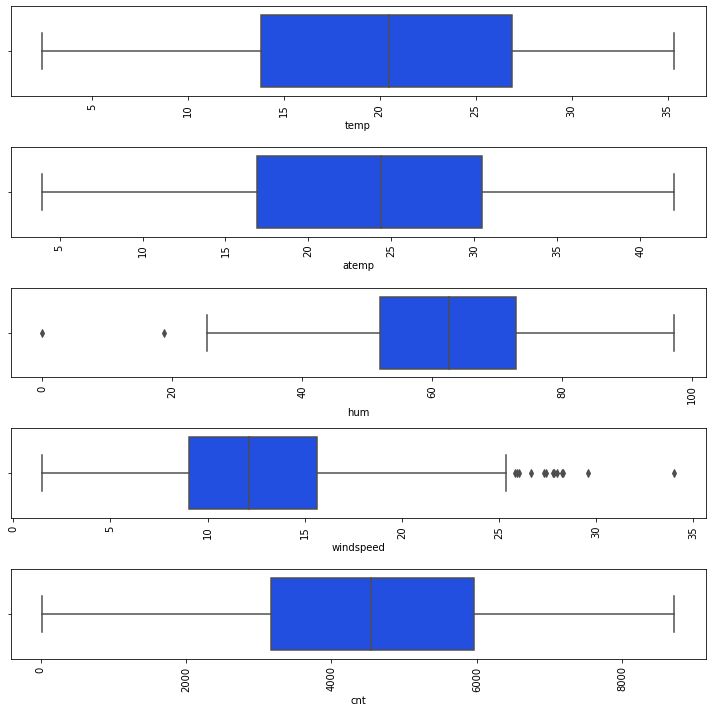

In [23]:
req_cols=['temp','atemp','hum','windspeed','cnt']

plt.figure(figsize = (10, 10))
sns.set_palette('bright')
for col in enumerate(req_cols):
    plt.subplot(5, 1, col[0]+1)
    sns.boxplot(x = col[1], data = bike)
    plt.xticks(rotation = 90)
    plt.tight_layout()

In [24]:
bike.hum.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

In [26]:
#diff will provide the difference between outliers and 1st percentile. If the value is too big, we can conclude that there are outliers.
diff_hum =bike.hum.quantile(0.01)-bike.hum.min() 
diff_hum

31.209592999999998

We can see that Zero humidity value is present in dataset which seems like outlier.
As this data referes to true values, and since it is important to consider all true values while building a model,
let's not drop this value.

In [27]:
bike.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

In [28]:
#diff will provide the difference between outliers and 99th percentile. If the value is too big, we can conclude that there are outliers.

diff_windspeed =bike.windspeed.max() -bike.windspeed.quantile(0.99) 
diff_windspeed

6.61907338

Difference is not too high.So let's retain all rows in both hum and windspeed columns

# DATA VISUALISATION

## EDA & Correlation Check

In [29]:
bike.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

## Univariate analysis for categorical variables

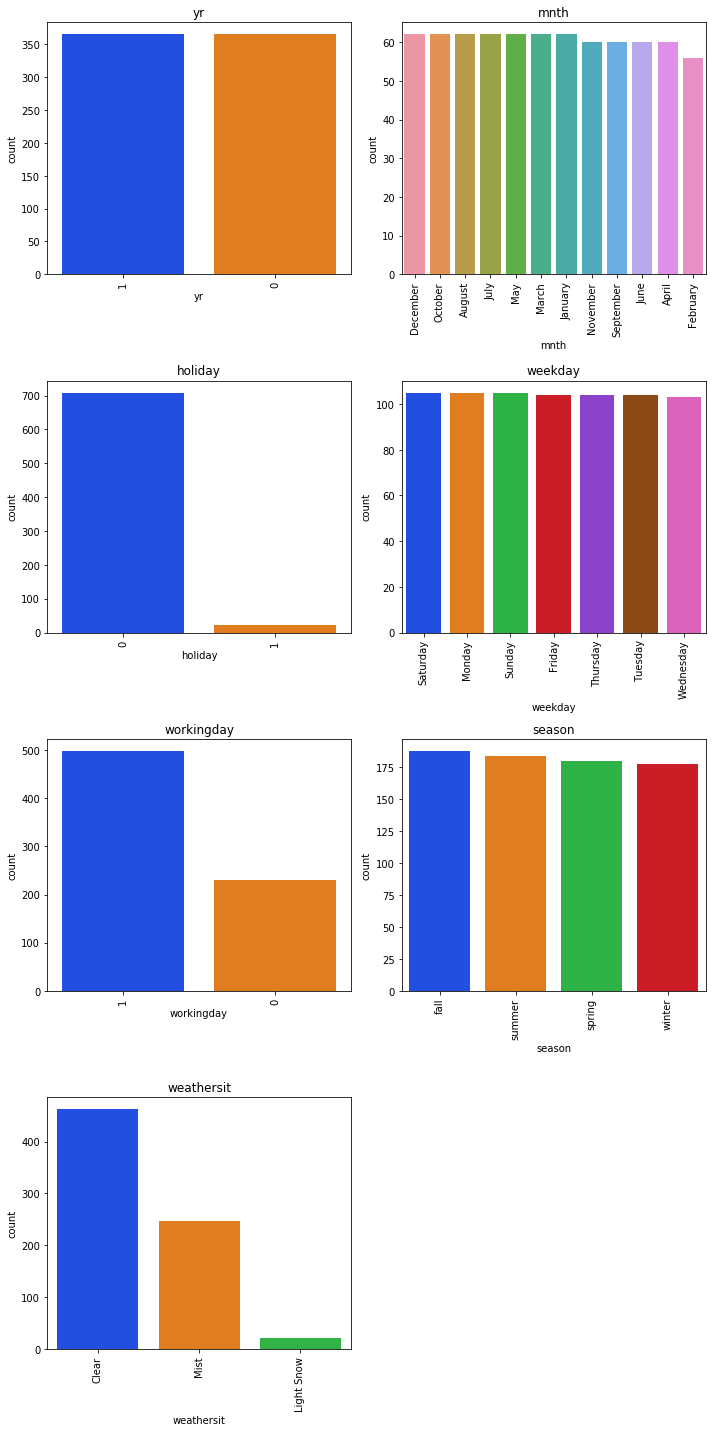

In [30]:
req_cols=['yr','mnth','holiday','weekday','workingday','season','weathersit']

sns.set_palette("bright")

plt.figure(figsize = (10, 20))

for col in enumerate(req_cols):
    plt.subplot(4, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.countplot(data = bike, x= col[1], order=bike[col[1]].value_counts().index) 
    plt.xticks(rotation = 90)
    plt.tight_layout()

We can see that data is recorded for 2 years, for all 12 months.
Only useful information what we can get from above graphs is ,the data has values only for 3 weather situation

## Univariate analysis for numerical columns

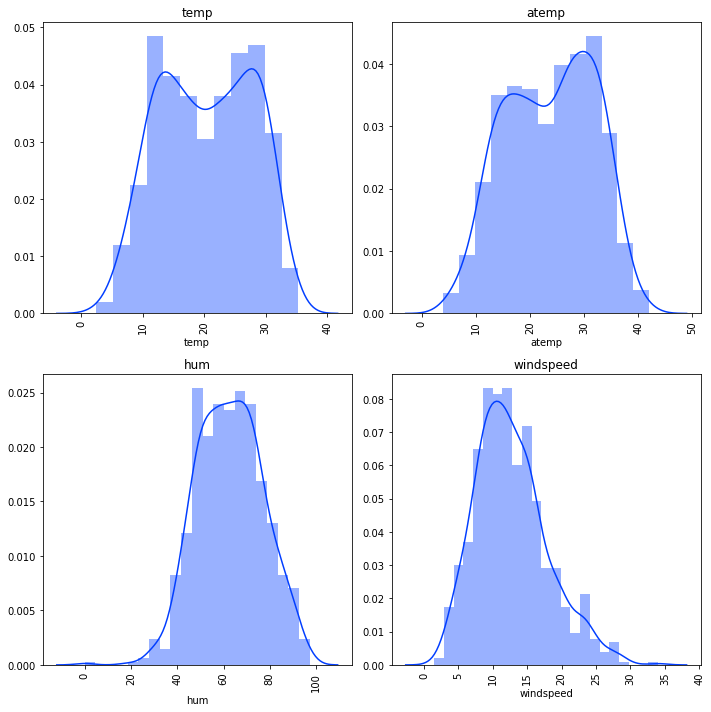

In [31]:
numerical_cols=['temp','atemp','hum','windspeed']

plt.figure(figsize = (10, 10))

for col in enumerate(numerical_cols):
    plt.subplot(2, 2, col[0]+1)
    plt.title(col[1])
    sns.distplot(bike[col[1]], hist =True) #BLUE
    plt.tight_layout()
    plt.xticks(rotation = 90)

From above graphs ,<br>
1.  Mostly the temperature is recorded near 10 or 30 Celsius
2.  In column,atemp which is nothing but feeling temperature have maximum rows with values around 30 Celsius
3.  Windspeed around 10 is having highest count and humidity have value 0 also.


## Bivariate Analysis for categorical columns

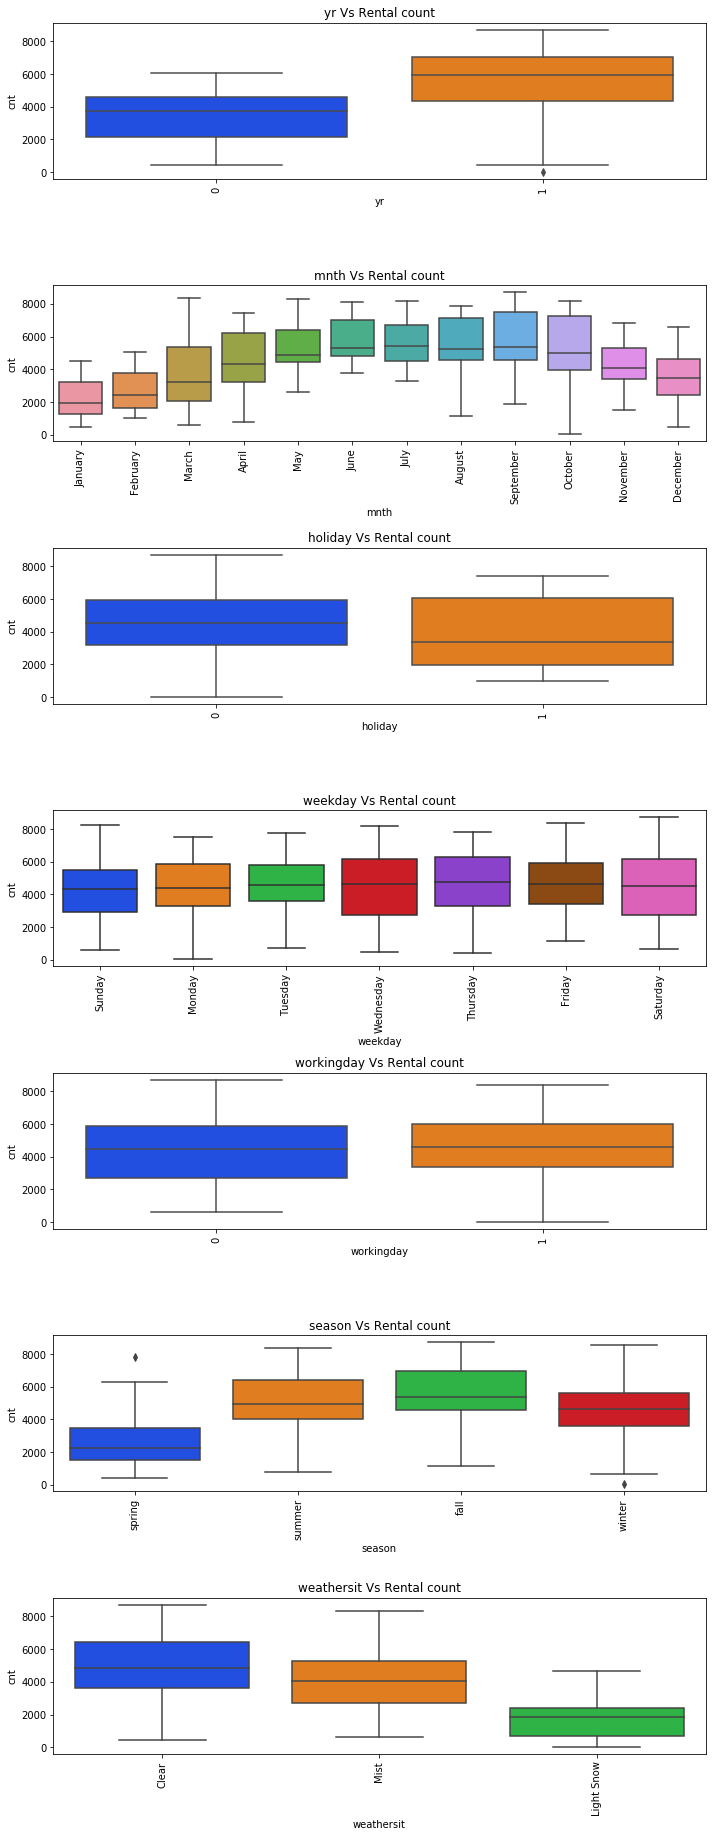

In [32]:
req_cols=['yr','mnth','holiday','weekday','workingday','season','weathersit']
sns.set_palette("bright")

plt.figure(figsize = (10, 25))

for col in enumerate(req_cols):
    plt.subplot(7, 1, col[0]+1)
    plt.title(col[1]+ " Vs Rental count")
    sns.boxplot(data =bike,x=col[1],y='cnt')
    plt.tight_layout()
    plt.xticks(rotation = 90)

Summarizing the above bivariate analysis : 
    
1. The median for year 2019 is higher than 2018
2. The count is higher for month september and median value for each month keeps increasing and started decreasing again.
3. The cnt median is lower for holiday=1 (i.e on holidays)(The same pattern is represented in workingday feature also).
4. Weathersit clearly depicts that the cnt was high if weather situation is "Clear, Few clouds, Partly cloudy, Partly cloudy".

**Let's visualize same data in barchart.**

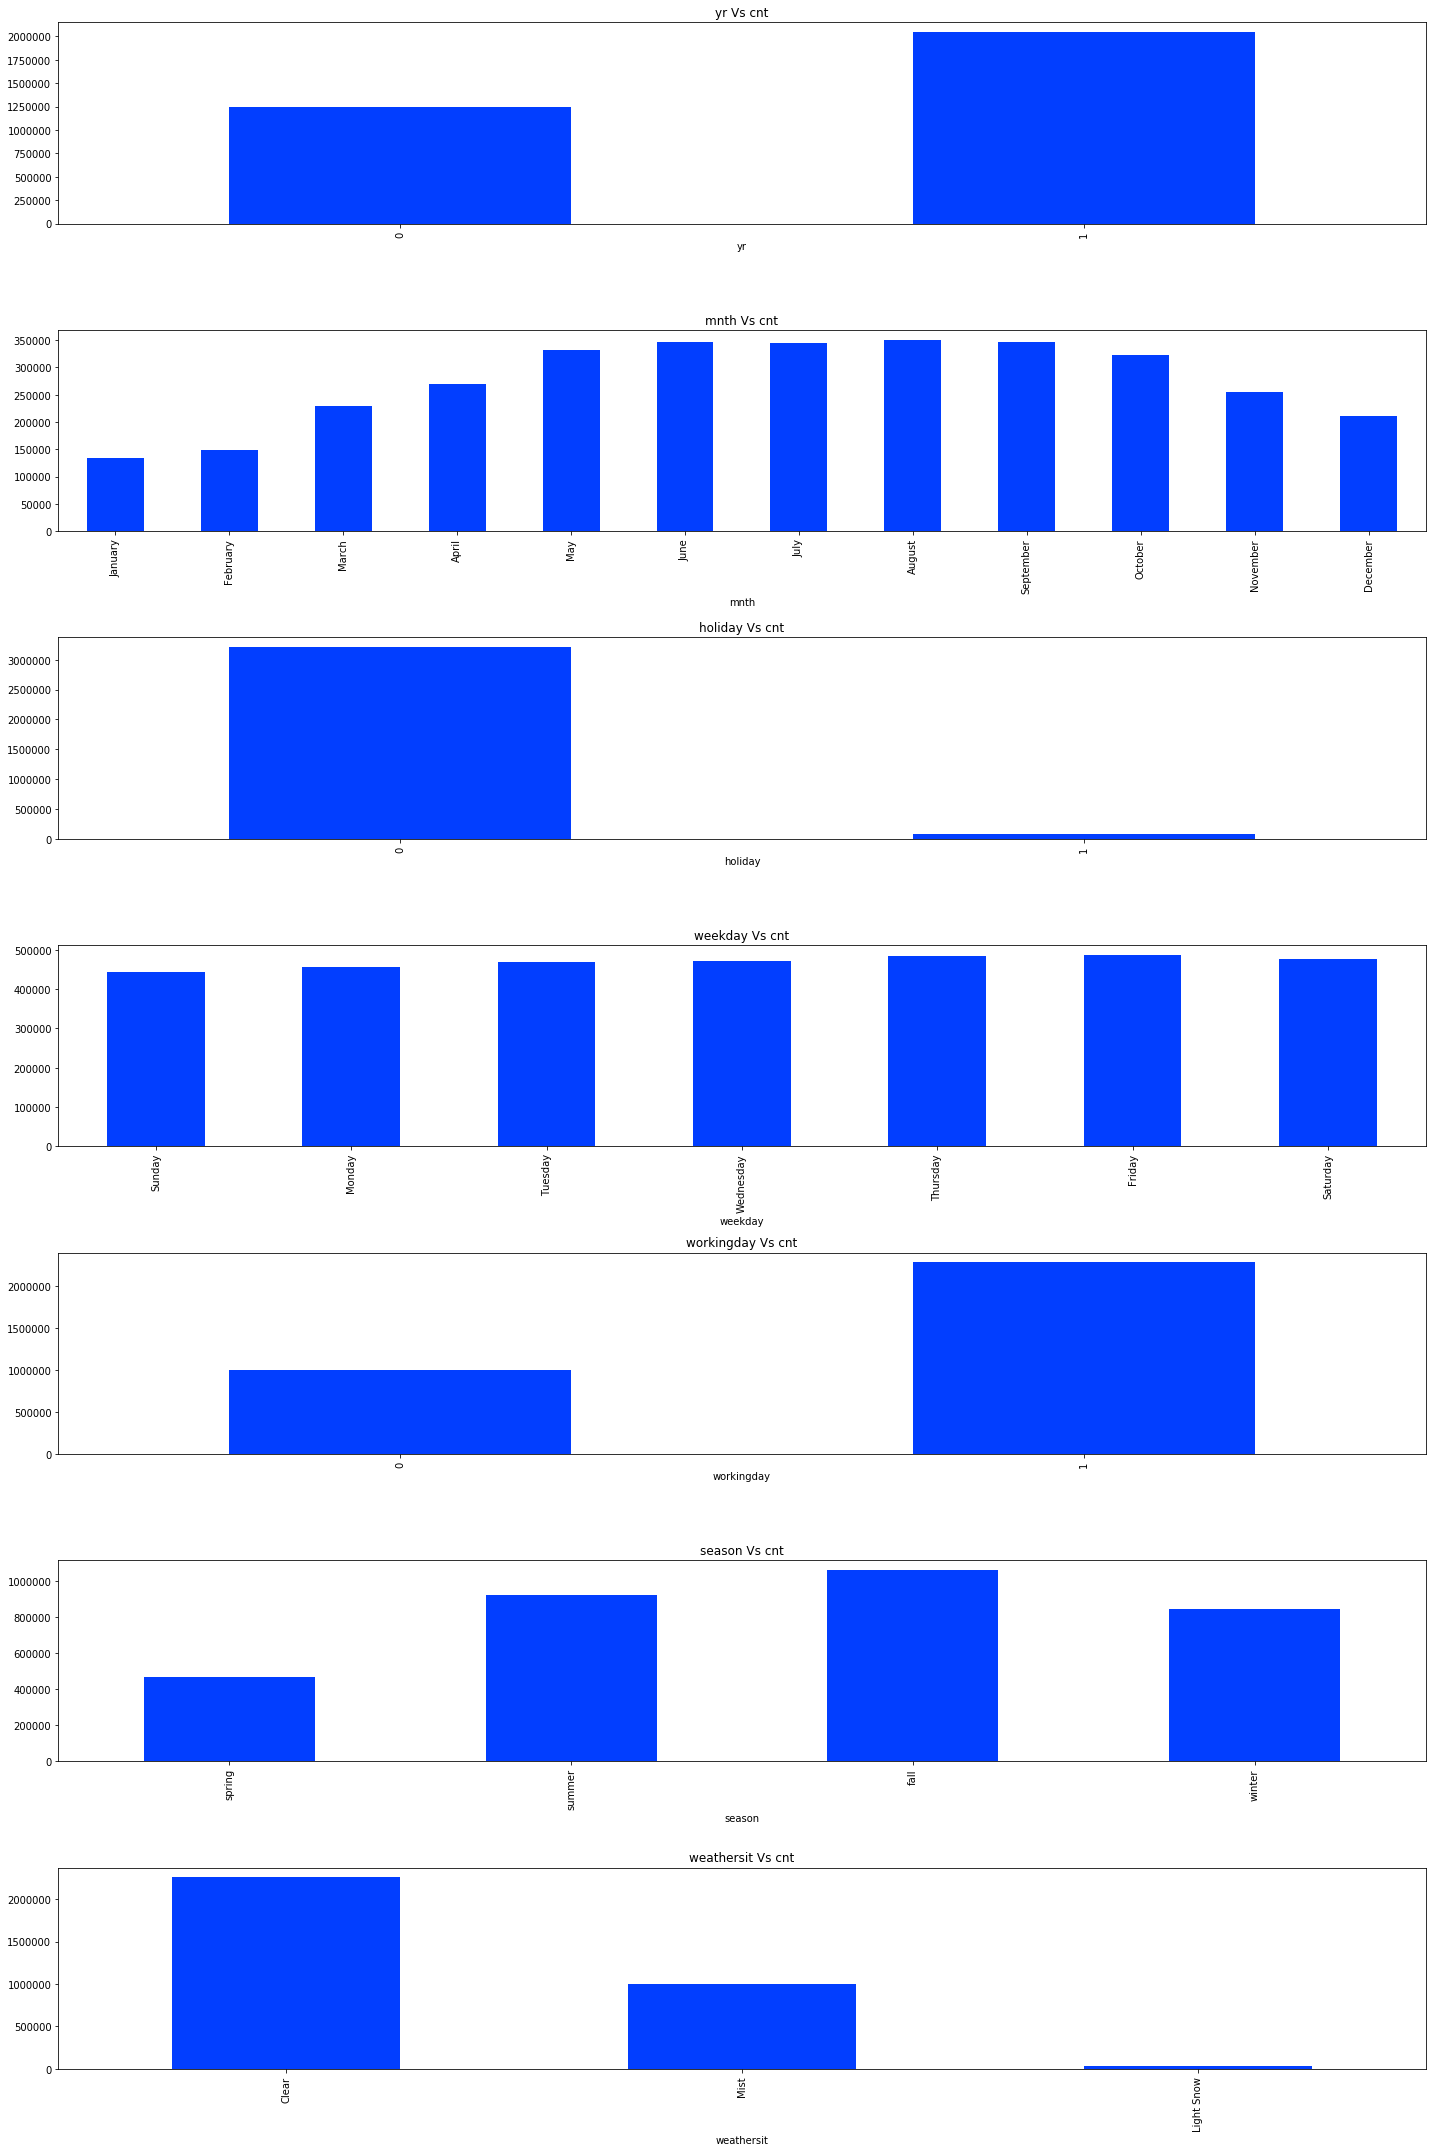

In [33]:
req_cols=['yr','mnth','holiday','weekday','workingday','season','weathersit']
sns.set_palette("bright")

plt.figure(figsize = (20, 30))

for col in enumerate(req_cols):
    plt.subplot(7, 1, col[0]+1)
    plt.title(col[1]+ " Vs cnt")
    bike.groupby(col[1])['cnt'].sum().plot.bar()    
    plt.tight_layout()
    plt.xticks(rotation = 90)



Quick Summary :As year goes, the popularity increases.

Spring runs from March to May ; <br>
Summer runs from June to August ; <br>
Fall  runs from September to November ; and <br>
Winter runs from December to February.<br>

From above graphs, we can see that rental count **"cnt" is less for spring & winter and more for fall & summer.**
The same trend is found in month also.The months corresponding to "fall and summer " season have high counts and the months corresponding to "spring and winter" has less count. Thus the pattern seen in mnth is right.

Rental count is less on holidays.In other words, more on working days.

## Bivariate Analysis for numericals columns

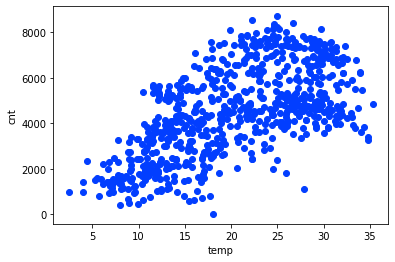

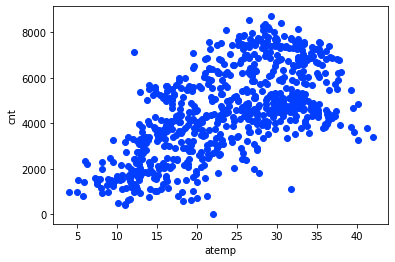

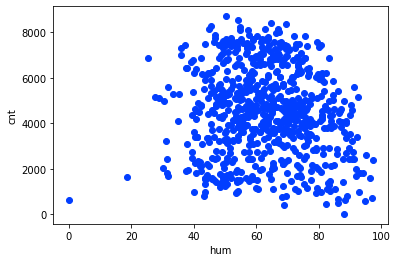

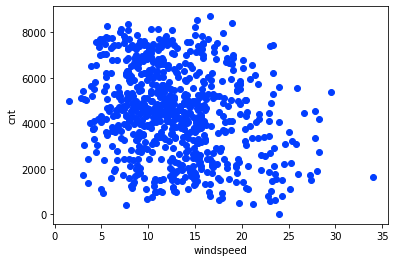

In [34]:
numerical_cols=['temp','atemp','hum','windspeed']

for i in numerical_cols:
    plt.scatter(x=bike[i], y=bike['cnt'])
    plt.ylabel('cnt')
    plt.xlabel(i)
    plt.show()

From above scatter plots, we can see that the graph for temp vs cnt amd atemp vs cnt are almost similar

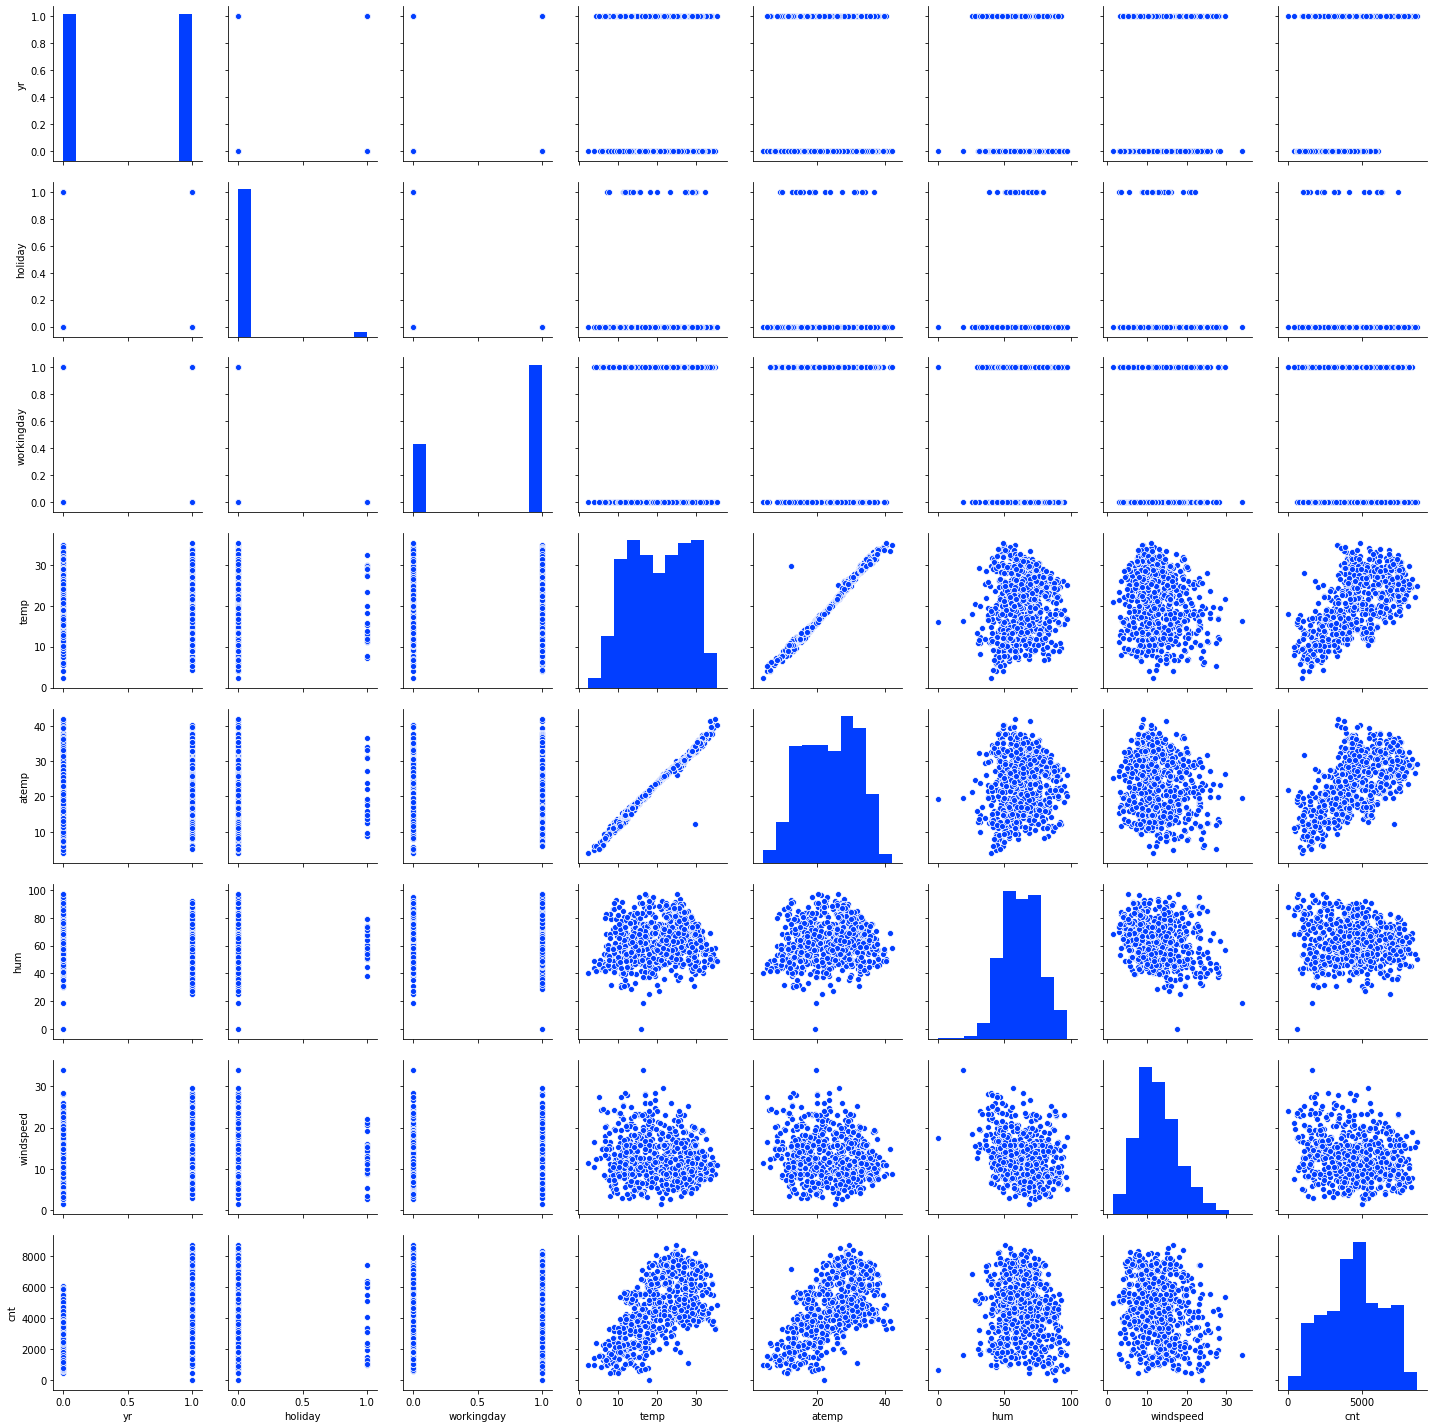

In [35]:
sns.pairplot(bike)
plt.show()

From pairplot we can see that
1. the temp,atemp variable have linear relationship.
2. cnt is less for holiday.
3. cnt is more for yr 2019 than 2018. (They are slowly gaining popularity)

## Multivariate Analysis

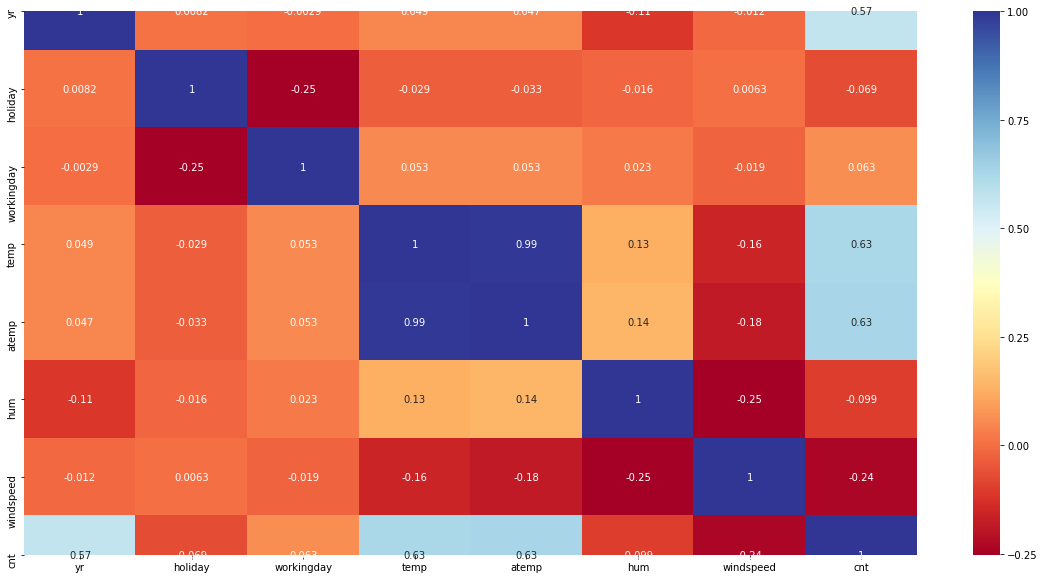

In [36]:
plt.figure(figsize = (20,10))        # Size of the figure

sns.heatmap(bike.corr(),cmap="RdYlBu",annot=True)

**We can see that temp and atemp are highly correlated (0.99)**

In [37]:
bike.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


From heatmap and correlation matrix,we can see that:

1. cnt and year variable have good correlation.
2. Similarly cnt and temp/atemp also highly correlated.
3. cnt and holiday,cnt and hum ,cnt and windspeed are negatively correlated

## DATA PREPARATION FOR MODEL

### Create Dummies for categorical columns

In [38]:
bike.dtypes

season        category
yr               int64
mnth          category
holiday          int64
weekday       category
workingday       int64
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

We already converted season,mnth,weekday,weathersit to category datatype and mapped the int values to strings also

In [39]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


Now we can create dummies for season,mnth,weekday,weathersit columns

In [40]:
# Let's dummify the season column.
seasons = pd.get_dummies(bike['season'], drop_first = True)

# Add the results to the original bike dataframe
bike = pd.concat([bike, seasons], axis = 1)

# Now let's see the head of our dataframe.
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [41]:
# Let's dummify the mnth column.
month = pd.get_dummies(bike['mnth'], drop_first = True)

# Add the results to the original bike dataframe
bike = pd.concat([bike, month], axis = 1)

# Now let's see the head of our dataframe.
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,March,April,May,June,July,August,September,October,November,December
0,spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,0
1,spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Let's dummify the weekday column.
weekdays = pd.get_dummies(bike['weekday'], drop_first = True)

# Add the results to the original bike dataframe
bike = pd.concat([bike, weekdays], axis = 1)

# Now let's see the head of our dataframe.
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,September,October,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,1
1,spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,1,0,0,0


In [43]:
# Let's dummify the weathersit column.
weather = pd.get_dummies(bike['weathersit'], drop_first = True)

# Add the results to the original bike dataframe
bike = pd.concat([bike, weather], axis = 1)

# Now let's see the head of our dataframe.
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist,Light Snow
0,spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,1,1,0
1,spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,0,0,0
4,spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,0,0,0


Now let's drop the season,mnth,weekday,weathersit columns

In [44]:
bike.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [45]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist,Light Snow
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


Earlier we saw that temp and atemp are highly correlated(0.99).They have linear relationship. So it's better to drop one column.
Let's drop atemp as it's relative temperature. 

In [46]:
##Dropping atemp col.

bike.drop('atemp',axis=1,inplace=True)

In [47]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist,Light Snow
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [48]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'summer', 'fall', 'winter', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Mist', 'Light Snow'],
      dtype='object')

## Now let's split the train and test data

In [49]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [51]:
# Apply scaler() to all the columns except the 'yes-no' , 'dummy' variables and target variables
num_vars = ['temp', 'hum', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist,Light Snow
653,1,0,1,0.509887,0.575354,0.300794,7534,0,0,1,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,7216,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,4066,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,1796,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,4220,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [52]:
#Percentage of missing values in each col.
nullseries = round(bike.isnull().sum() * 100 / len(bike),2)
print(nullseries)

yr            0.0
holiday       0.0
workingday    0.0
temp          0.0
hum           0.0
windspeed     0.0
cnt           0.0
summer        0.0
fall          0.0
winter        0.0
February      0.0
March         0.0
April         0.0
May           0.0
June          0.0
July          0.0
August        0.0
September     0.0
October       0.0
November      0.0
December      0.0
Monday        0.0
Tuesday       0.0
Wednesday     0.0
Thursday      0.0
Friday        0.0
Saturday      0.0
Mist          0.0
Light Snow    0.0
dtype: float64


None of the values got missed

### Dividing into X and Y sets for the model building

In [53]:
y_train = df_train.pop('cnt')
X_train = df_train

## DATA MODELLING AND EVALUATION

#### Let's use **mixed approach**.First let's use RFE and then manual selection of columns

In [54]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [55]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [56]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('February', False, 6),
 ('March', False, 2),
 ('April', False, 4),
 ('May', False, 3),
 ('June', False, 5),
 ('July', False, 9),
 ('August', True, 1),
 ('September', True, 1),
 ('October', True, 1),
 ('November', False, 11),
 ('December', False, 14),
 ('Monday', False, 7),
 ('Tuesday', False, 8),
 ('Wednesday', False, 12),
 ('Thursday', False, 13),
 ('Friday', False, 10),
 ('Saturday', True, 1),
 ('Mist', True, 1),
 ('Light Snow', True, 1)]

In [57]:
col = X_train.columns[rfe.support_] ##forming new df with columns that have rfe support
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'August', 'September', 'October', 'Saturday', 'Mist',
       'Light Snow'],
      dtype='object')

In [58]:
X_train.columns[~rfe.support_] ##columns with no rfe support 

Index(['February', 'March', 'April', 'May', 'June', 'July', 'November',
       'December', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [59]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe1 = X_train[col]

In [60]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe1)

In [61]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()   # Running the linear model

In [62]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.89e-191
Time:                        12:19:15   Log-Likelihood:                -4105.7
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     494   BIC:                             8311.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1716.9790    249.590      6.879      0.0

Looking at the p-values, it looks like fall feature variables isn't really significant.

In [63]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
X_train_new1 = X_train_rfe1.drop(['const'], axis=1)

In [65]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.06
4,hum,17.47
7,fall,8.19
2,workingday,5.05
5,windspeed,3.88
6,summer,3.44
8,winter,2.88
13,Mist,2.15
0,yr,2.04
12,Saturday,1.90


In [66]:
## Dropping fall column in 2nd model.  
X_train_rfe2 = X_train_rfe1.drop(["fall"], axis = 1)

In [67]:
# Build a 2nd model fitted model
X_train_lm2 = sm.add_constant(X_train_rfe2)

lr_2 = sm.OLS(y_train, X_train_lm2).fit()

In [68]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.24e-192
Time:                        12:21:44   Log-Likelihood:                -4106.6
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     495   BIC:                             8307.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1712.9452    249.777      6.858      0.0

Looking at p-values, holiday looks insignificant

In [69]:
X_train_new2 = X_train_rfe2.drop(['const'], axis=1)

In [70]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.59
3,temp,10.01
2,workingday,5.05
5,windspeed,3.82
7,winter,2.27
12,Mist,2.14
0,yr,2.03
11,Saturday,1.90
6,summer,1.83
10,October,1.62


In [71]:
##dropping holiday column while building 3td model

X_train_rfe3 = X_train_rfe2.drop(["holiday"], axis = 1)

In [72]:
# Build a 3rd model fitted model
X_train_lm3 = sm.add_constant(X_train_rfe3)

lr_3 = sm.OLS(y_train, X_train_lm3).fit()

In [73]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.86e-192
Time:                        12:21:57   Log-Likelihood:                -4108.8
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     496   BIC:                             8305.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1628.1115    247.242      6.585      0.0

In [74]:
X_train_new3 = X_train_rfe3.drop(['const'], axis=1)

In [75]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.09
2,temp,10.01
1,workingday,4.55
4,windspeed,3.76
6,winter,2.27
11,Mist,2.13
0,yr,2.03
5,summer,1.82
10,Saturday,1.79
9,October,1.61


In [76]:
##Let's try to acheive p-values = 0. Let's drop  october col while building 4th model

X_train_rfe4 = X_train_rfe3.drop(["October"], axis = 1)

In [77]:
# Build a 4th model fitted model
X_train_lm4 = sm.add_constant(X_train_rfe4)

lr_4 = sm.OLS(y_train, X_train_lm4).fit()

In [78]:
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.47e-192
Time:                        12:22:40   Log-Likelihood:                -4112.0
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     497   BIC:                             8305.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1562.8455    247.081      6.325      0.0

In [79]:
X_train_new4 = X_train_rfe4.drop(['const'], axis=1)

In [80]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.05
2,temp,9.76
1,workingday,4.53
4,windspeed,3.76
10,Mist,2.12
0,yr,2.02
5,summer,1.82
9,Saturday,1.79
6,winter,1.75
7,August,1.59


In [81]:
##Dropping august col while bulding 5th mmodel

X_train_rfe5 = X_train_rfe4.drop(["August"], axis = 1)

In [82]:
# Build a 5th model fitted model
X_train_lm5 = sm.add_constant(X_train_rfe5)

lr_5 = sm.OLS(y_train, X_train_lm5).fit()

In [83]:
# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.89e-191
Time:                        12:22:56   Log-Likelihood:                -4117.3
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     498   BIC:                             8309.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1498.0851    248.641      6.025      0.0

In [84]:
X_train_new5 = X_train_rfe5.drop(['const'], axis=1)

In [85]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.98
2,temp,8.12
1,workingday,4.53
4,windspeed,3.73
9,Mist,2.10
0,yr,2.02
8,Saturday,1.79
6,winter,1.66
5,summer,1.58
7,September,1.20


In [86]:
## Now all pvalues are zero. So let's drop the col hum which have highest VIF in model-6

X_train_rfe6 = X_train_rfe5.drop(["hum"], axis = 1)

In [87]:
# Build a 6th model fitted model
X_train_lm6 = sm.add_constant(X_train_rfe6)

lr_6 = sm.OLS(y_train, X_train_lm6).fit()

In [88]:
# Print the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.47e-188
Time:                        12:23:07   Log-Likelihood:                -4126.6
No. Observations:                 510   AIC:                             8275.
Df Residuals:                     499   BIC:                             8322.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        676.7252    161.635      4.187      0.0

In [89]:
X_train_new6 = X_train_rfe6.drop(['const'], axis=1)

In [90]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,Saturday,1.69
4,summer,1.57
8,Mist,1.53
5,winter,1.40
6,September,1.20
9,Light Snow,1.08


## Model-6 looks good.All the expected conditions are met.

### pvalue of variables<0.05, VIF<5, R2=84%,adj r2=83%,predictor variables=10. So we can stop here and make this final model also. 

**But Let's drop one more column and try to build less complex model.**


When I tried dropping one variable from model-6, I found there is significant drop in R2 and adj R2 if we drop any other variable other than saturday or windspeed. So now let's build model-7 by dropping saturday col and model-8 by dropping windspeed column/feature

In [91]:
## Building model-7 from model-6 by dropping saturday col

X_train_rfe7 = X_train_rfe6.drop(["Saturday"], axis = 1)

In [92]:
# Build a 7th model fitted model
X_train_lm7 = sm.add_constant(X_train_rfe7)

lr_7 = sm.OLS(y_train, X_train_lm7).fit()

In [93]:
# Print the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     268.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.34e-185
Time:                        12:23:27   Log-Likelihood:                -4137.7
No. Observations:                 510   AIC:                             8295.
Df Residuals:                     500   BIC:                             8338.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        946.4645    154.318      6.133      0.0

In [94]:
X_train_new7 = X_train_rfe7.drop(['const'], axis=1)

In [95]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.28
3,windspeed,3.16
1,workingday,2.81
0,yr,2.01
4,summer,1.56
7,Mist,1.50
5,winter,1.38
6,September,1.20
8,Light Snow,1.08


In [96]:
## Building model-8 also from model-6 but this time by dropping windspeed col

X_train_rfe8 = X_train_rfe6.drop(["windspeed"], axis = 1)

In [97]:
# Build a 8th model fitted model
X_train_lm8 = sm.add_constant(X_train_rfe8)

lr_8 = sm.OLS(y_train, X_train_lm8).fit()

In [98]:
# Print the summary of the model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          9.24e-182
Time:                        12:23:37   Log-Likelihood:                -4145.5
No. Observations:                 510   AIC:                             8311.
Df Residuals:                     500   BIC:                             8353.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        118.3453    139.170      0.850      0.3

In [99]:
X_train_new8 = X_train_rfe8.drop(['const'], axis=1)

In [100]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.50
1,workingday,3.63
0,yr,1.98
6,Saturday,1.55
3,summer,1.53
7,Mist,1.51
4,winter,1.38
5,September,1.19
8,Light Snow,1.07


**We checked with 9 variables. If we drop any other variable other than saturday or windspeed,there is significant drop in adj R2.
So either model 7 or model 8 is good for 9 variables**

In [101]:
### Dropping one more column and checking

In [102]:
##From model-8,saturday is dropped 

X_train_rfe9 = X_train_rfe8.drop(["Saturday"], axis = 1)

In [103]:
# Build a 9th model fitted model
X_train_lm9 = sm.add_constant(X_train_rfe9)

lr_9 = sm.OLS(y_train, X_train_lm9).fit()

In [104]:
# Print the summary of the model
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     278.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.01e-179
Time:                        12:23:50   Log-Likelihood:                -4155.2
No. Observations:                 510   AIC:                             8328.
Df Residuals:                     501   BIC:                             8367.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        389.5572    127.062      3.066      0.0

In [105]:
X_train_new9 = X_train_rfe9.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,temp,3.74
1,workingday,2.70
0,yr,1.97
3,summer,1.52
6,Mist,1.47
4,winter,1.35
5,September,1.19
7,Light Snow,1.06


In [106]:
### Working day is insignificant.Dropping this and checking below:

In [107]:
X_train_rfe10 = X_train_rfe9.drop(["workingday"], axis = 1)

# Build a 10th model fitted model
X_train_lm10 = sm.add_constant(X_train_rfe10)

lr_10 = sm.OLS(y_train, X_train_lm10).fit()

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.91e-178
Time:                        12:23:57   Log-Likelihood:                -4159.2
No. Observations:                 510   AIC:                             8334.
Df Residuals:                     502   BIC:                             8368.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        521.3805    118.906      4.385      0.0

In [108]:
X_train_new10 = X_train_rfe10.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,temp,2.85
0,yr,1.94
2,summer,1.51
5,Mist,1.43
3,winter,1.33
4,September,1.19
6,Light Snow,1.06


### Further dropping variables leads to decrease in adj R2.So we can stop building further models

## We can clearly see that model-6.model-7 and model-8 are better than other models.Let's do residual analysis for model-6,model-7 and model-8

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

### Using model-6

In [109]:
y_train_cnt6 = lr_6.predict(X_train_lm6) ##predicting the cnt from the model-6

Text(0.5, 0, 'Errors')

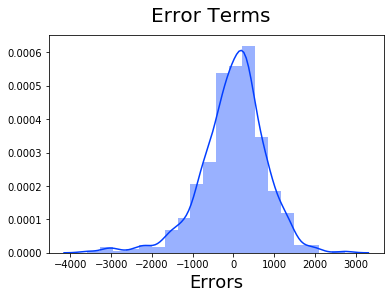

In [110]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt6), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Using model-7

In [111]:
y_train_cnt7 = lr_7.predict(X_train_lm7) ##predicting the cnt from the model-7

Text(0.5, 0, 'Errors')

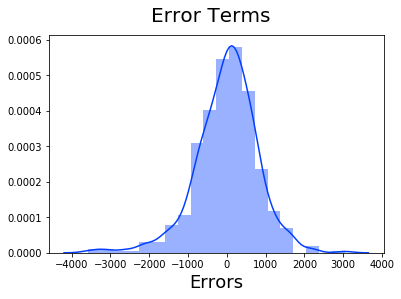

In [112]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt7), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Using model-8

In [113]:
y_train_cnt8 = lr_8.predict(X_train_lm8) ##predicting the cnt from the model-8

Text(0.5, 0, 'Errors')

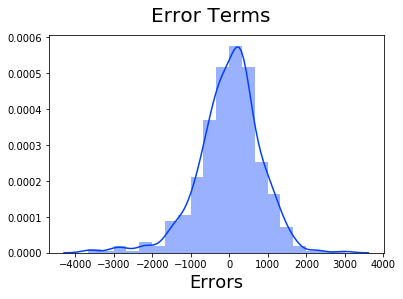

In [114]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt8), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 

plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Let's do Durbin_Watson statistic test on residuls or error terms to prove that the error terms are independent of each other

In [115]:
r6= y_train - y_train_cnt6
print("Model-6 ",round(sm.stats.stattools.durbin_watson(r6),2))

r7= y_train - y_train_cnt7
print("Model-7 ",round(sm.stats.stattools.durbin_watson(r7),2))

r8= y_train - y_train_cnt8
print("Model-8 ", round(sm.stats.stattools.durbin_watson(r8),2))

##Model 7,8 have more independent error terms. Closer the values to 2 means,no dependency between error terms 

## the same value is seen in model summary also.

Model-6  2.08
Model-7  2.05
Model-8  2.05


Quick analysis on all three models:

1. Error terms are normally distributed with mean zero.Residual analyis is done and error terms are plotted.(Graph is plotted above)

2. Error terms are independent of each other.(the durbin_watson coefficient is closer to 2.So, no dependency between error terms 

3. VIF is less than 5.That way multicollinearity is taken care.

4. Only significant features are selected in model.( Adjusted R2 is 0.82 and p values for predictor variables are zero)

From above points, we can see that all 3 models satisfy the assumptions of Linear Regression models.

## Comparing  6th , 7th and 8th  Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the best model out of 6th,7th and 8th model.

#### Applying the scaling on the test sets

Scaling is done same cols for which it was done in training data set. We wont fit. We only transform for test data

In [116]:
num_vars = ['temp', 'hum', 'windspeed'] 

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [117]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist,Light Snow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,4546.981735,0.264840,0.246575,0.232877,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,1898.633630,0.442259,0.432005,0.423633,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,3303.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,4579.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,5869.500000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist,Light Snow
184,0,1,0,0.831783,0.657364,0.084219,6043,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,6211,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,2659,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,4780,0,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,4968,1,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Dividing into X_test and y_test

In [119]:
 ## cnt col is popped and stored in y_test.Remaining dataset is made as X_test.
    
y_test = df_test.pop('cnt')
X_test = df_test

### Predicting using 6th model

In [120]:
# Now let's use our model to make predictions.

# Creating X_test_m6 dataframe.

X_test_m6= X_test[X_train_new6.columns]

# Adding a constant variable 
X_test_m6 = sm.add_constant(X_test_m6)

In [121]:
X_test_m6.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'summer', 'winter',
       'September', 'Saturday', 'Mist', 'Light Snow'],
      dtype='object')

In [122]:
# Making predictions using the sixth model

y_pred_m6 = lr_6.predict(X_test_m6)

Text(0, 0.5, 'y_pred')

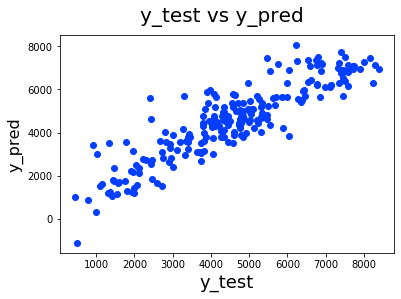

In [123]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m6)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [124]:
from sklearn.metrics import mean_squared_error, r2_score

##Finding MSE and R2

mse_m6 = mean_squared_error(y_test, y_pred_m6)
r_squared_m6 = r2_score(y_test,y_pred_m6)

In [125]:
##Printing MSE and R2

print('Mean_Squared_Error :' ,mse_m6)
print('r_square_value :',round(r_squared_m6,2))


Mean_Squared_Error : 733514.4484156454
r_square_value : 0.8


### Predicting using 7th model

In [126]:
# Now let's use our model to make predictions.

# Creating X_test_m7 dataframe 

X_test_m7= X_test[X_train_new7.columns]

# Adding a constant variable 
X_test_m7 = sm.add_constant(X_test_m7)

In [127]:
# Making predictions using the seventh model

y_pred_m7 = lr_7.predict(X_test_m7)

Text(0, 0.5, 'y_pred')

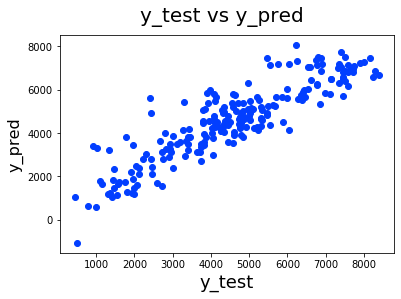

In [128]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m7)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [129]:
from sklearn.metrics import mean_squared_error, r2_score

##Finding MSE and R2

mse_m7 = mean_squared_error(y_test, y_pred_m7)
r_squared_m7 = r2_score(y_test,y_pred_m7)

In [130]:
##Printing MSE and R2

print('Mean_Squared_Error :' ,mse_m7) 
print('r_square_value :',round(r_squared_m7,2))

Mean_Squared_Error : 746300.7181808798
r_square_value : 0.79


### Predicting using model-8

In [131]:
# Now let's use our model to make predictions.

# Creating X_test_m8 dataframe 
X_test_m8= X_test[X_train_new8.columns]

# Adding a constant variable 
X_test_m8 = sm.add_constant(X_test_m8)

In [132]:
# Making predictions using the eight model

y_pred_m8 = lr_8.predict(X_test_m8)

Text(0, 0.5, 'y_pred')

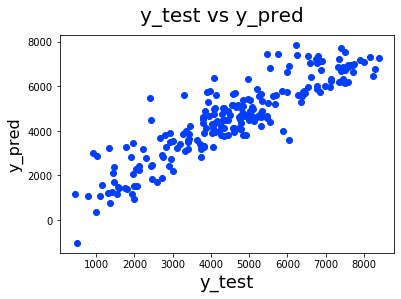

In [133]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m8)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [134]:
from sklearn.metrics import mean_squared_error, r2_score

##Finding MSE and R2

mse_m8 = mean_squared_error(y_test, y_pred_m8)
r_squared_m8 = r2_score(y_test,y_pred_m8)

In [135]:
##Printing MSE and R2 

print('Mean_Squared_Error :' ,mse_m8)
print('r_square_value :',round(r_squared_m8,2))

Mean_Squared_Error : 717399.1313800972
r_square_value : 0.8


## Clearly model-7 is not best ones.MSE is high and test data R2 is 79% The difference between training and test R2 is 4%.So, we can assign 3rd rank for this model.

### R2=0.828, adj R2 =0.825 ,test data R2=79 %, MSE=746300.7181808798,no of variables=9,p-value<0.05,VIF<5.
### Durbin_Watson statistic test value = 2.05


#### Equation : 
***cnt = 946.46 + 2020.67 * year + 206.51 * workingday + 4783.07 * temp - 1325.05 * windspeed + 760.33 * summer + 1135.10 * winter + 845.62 * september  - 688.36 * Mist - 2452.73 * Light Snow***


## Now let's compare model-6 and model-8

## Model-6

### R2=0.836 ,adj R2=0.832 ,test data R2=0.80 ,MSE=733514.4484156454,no of varaibles=10,p value<0.05,VIF<5.
### Durbin_Watson statistic test value = 2.08


#### Equation :

***cnt = 676.72 + 2025.73 * year +489.55 * workingday + 4780.04 * temp - 1349.33 * windspeed + 759.93 * summer + 1145.83 * winter + 845.17 * september + 588.35 * saturday - 707.07 * Mist - 2503.48 * Light Snow***


## Model-8

### R2= 0.823,adj R2=0.82, test data R2=0.80 ,MSE=717399.1313800972,no of varaibles=9,p-value<0.05,VIF<5.
### Durbin_Watson statistic test value =2.05

#### Equation :

***cnt = 118.34 + 2014.30 * year +500.29 * workingday + 4996.87 * temp + 710.79 * summer + 1210.97 * winter + 900.31 * september + 569.99 * saturday - 690.49 * Mist - 2634.47 * Light Snow***

We can see that error is less for model-8 even though R2 is 2% less than model-6. But model-8 has less variables(9 variables) than model 6(10 variables) and less complex comparatively. We can also see that overfitting didn't happen in model as the difference between training and testing data is less(2%)

### So let's make Model-8 has final ones.

(Note : We can show model-8 to company people. If they want windspeed in their model, we can choose model-6)

### Our final model has following variables. 
1. year
2. working day
3. temp
4. summer
5. winter
6. september
7. saturday
8. Mist
9. Light Snow

We can conclude that the demand i.e the rental count cnt is high for fall(especially september) and summer season and 
less for winter and spring season. 

If the weather situation is " Clear, Few clouds, Partly cloudy, Partly cloudy", demand (rental count) will be more.

Eventhough winter also have positive coefficient, we can see that light snow,mist have negative coefficient.So rental count decreases for spring and winter when the weather situation is "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds" and
"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds".

The cnt is having positive coefficient for working day and saturday. Thus ,the demand increases on weekdays and saturdays.

The temp plays a major role. If the temp is good,the one unit increase in temp, increases cnt by 4997 units when other variables remain constant.

The demand is positively correlated with yr also.Above,in EDA, same was explained.The cnt for 2019 is more than 2018.
This shows that the bike sharing company is slowly gaining popularity.



------------------------------------------------------------------------------------------------------------------------